<a href="https://colab.research.google.com/github/PRANAV-rgb20/DEEP-LEARNING/blob/main/SGD_VS_ADAM_OPTIMIZER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Training with SGD Optimizer:
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.3281 - mean_absolute_error: 0.9031 - val_loss: 1.1318 - val_mean_absolute_error: 0.8504 - learning_rate: 0.0100
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1307 - mean_absolute_error: 0.8492 - val_loss: 1.1231 - val_mean_absolute_error: 0.8505 - learning_rate: 0.0100
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0696 - mean_absolute_error: 0.8362 - val_loss: 1.1003 - val_mean_absolute_error: 0.8445 - learning_rate: 0.0100
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1854 - mean_absolute_error: 0.8812 - val_loss: 1.1037 - val_mean_absolute_error: 0.8474 - learning_rate: 0.0100
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0289 - mean_absolute_error: 0.7996 - val_loss: 1.0935 - val_mean_absolute_error: 0.8443 - learning_rate: 0.0100
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0143 - mean_absolute_error: 0.8015 - val_loss: 1.0916 - val_mean_absolute_error: 0.8439 - l

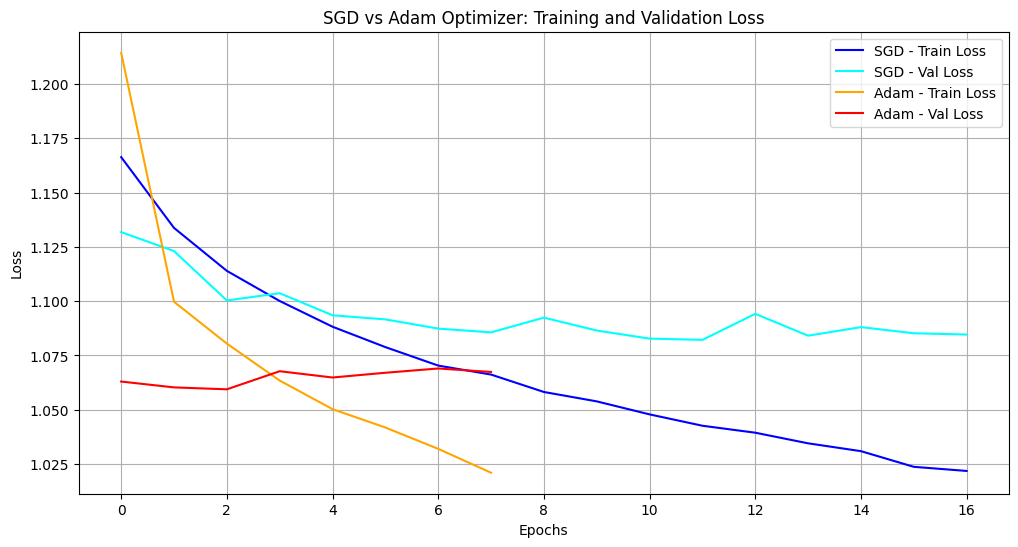

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Data Creation
def create_data():
    X = np.random.randn(1000, 10)
    y = np.random.randn(1000, 1)
    return X, y

# Model Creation
def create_model():
    model = models.Sequential([
        layers.Dense(50, activation='relu', input_shape=(10,)),
        layers.Dense(20, activation='relu'),
        layers.Dense(1)
    ])
    return model

# Training Function with Early Stopping and Learning Rate Scheduler
def train_model(model, optimizer, X_train, y_train, X_val, y_val, batch_size, epochs, optimizer_name):
    model.compile(optimizer=optimizer,
                  loss='mean_squared_error',
                  metrics=['mean_absolute_error'])

    early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Learning rate scheduler only for SGD
    lr_scheduler = None
    if optimizer_name == 'SGD':
        lr_scheduler = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

    history = model.fit(
        X_train, y_train,
        batch_size=batch_size,
        epochs=epochs,
        validation_data=(X_val, y_val),
        callbacks=[early_stop, lr_scheduler] if lr_scheduler else [early_stop],
        verbose=1
    )

    return history

# Main Code Execution
X, y = create_data()
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create models and optimizers
model_sgd = create_model()
model_adam = create_model()
optimizer_sgd = optimizers.SGD(learning_rate=0.01)
optimizer_adam = optimizers.Adam(learning_rate=0.001)

# Training Parameters
epochs = 50
batch_size = 32

# Train models
print("\nTraining with SGD Optimizer:")
sgd_history = train_model(model_sgd, optimizer_sgd, X_train, y_train, X_val, y_val, batch_size, epochs, 'SGD')

print("\nTraining with Adam Optimizer:")
adam_history = train_model(model_adam, optimizer_adam, X_train, y_train, X_val, y_val, batch_size, epochs, 'Adam')

# Plot Training and Validation Loss
plt.figure(figsize=(12, 6))
plt.plot(sgd_history.history['loss'], label='SGD - Train Loss', color='blue')
plt.plot(sgd_history.history['val_loss'], label='SGD - Val Loss', color='cyan')
plt.plot(adam_history.history['loss'], label='Adam - Train Loss', color='orange')
plt.plot(adam_history.history['val_loss'], label='Adam - Val Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('SGD vs Adam Optimizer: Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()
